<h1>Clean Notebook for QMIND Project</h1>
<p>Contributors:
<ul>
<li>Karim Ali</li>
<li>Ola Elmaghraby</li>
<li>Aimee Langevin</li>
<li>Ali Zidan</li>
</ul>
Project Manager: Frank Siyung Cho</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import cv2
import os
import random
from PIL import Image

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<h2>Data Preprocessing</h2>

<p>First we will be displaying initial images in the dataset.<br>Special thanks to Ola who worked tirelessly on preprocessing and cropping images</p>

In [2]:
root = 'C:/Users/siyun/OneDrive/Desktop/QMIND 2024/QMIND2024_Dataset/dataset_images'

In [3]:
#function displays a random image in a given subdirectory
def display_random_image_in_subdir(subdir_path):
    if os.path.isdir(subdir_path):
        all_files = os.listdir(subdir_path)

        jpeg_files = [file for file in all_files if file.lower().endswith(('.jpg'))]

        if jpeg_files: 
            random_jpeg = random.choice(jpeg_files) 
            random_jpeg_path = os.path.join(subdir_path, random_jpeg)

            img = cv2.imread(random_jpeg_path)
        
            if img is not None:
                img_resized = cv2.resize(img, (550,550))
            
                cv2.imshow('Random JPG Image in %s' %subdir_path, img_resized)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
        else:
            print("No JPEG files found in the directory.")

In [4]:
#display_random_image_in_subdir(root)

<p>Capture finalized labels</p>

In [5]:
labels_df = pd.read_csv('C:/Users/siyun/OneDrive/Desktop/QMIND 2024/QMIND2024_Dataset/new_dataset.csv')

#set column names
labels_df.columns = ['image_path', 'label']

In [6]:
print(labels_df.head())

                                          image_path  label
0  QMIND2024_Dataset/new_dataset_images/201704131...      0
1  QMIND2024_Dataset/new_dataset_images/201704131...      0
2  QMIND2024_Dataset/new_dataset_images/201704131...      0
3  QMIND2024_Dataset/new_dataset_images/201704131...      0
4  QMIND2024_Dataset/new_dataset_images/201704131...      0


In [7]:
unique_counts = labels_df['label'].value_counts()
print(unique_counts)

label
0    5442
1    4005
2     614
Name: count, dtype: int64


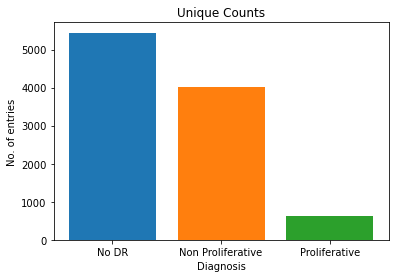

In [8]:
plt.bar('No DR' , unique_counts[0], label= 'No DR')
plt.bar('Non Proliferative' , unique_counts[1], label = 'Non Proliferative')
plt.bar('Proliferative' , unique_counts[2], label = 'Proliferative')
plt.xlabel("Diagnosis")
plt.ylabel("No. of entries")
plt.title("Unique Counts")
plt.show()

<p>Image Enhancement techniques</p>

In [ ]:
image_files = os.listdir(root)
x_train = [cv2.cvtColor(cv2.imread(os.path.join(root, file), cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB) for file in image_files]

<p>Image Augmentation techniques</p>

In [ ]:
Train_Generator = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.1,
                                    rotation_range=90,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode="nearest",
                                    validation_split=0.1)

In [ ]:
Train_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=labels_df,
                                                   x_col="filename",
                                                   y_col="label",
                                                   color_mode="rgb",
                                                   class_mode="raw",
                                                   batch_size = 50,
                                                   subset="training")

In [ ]:
validation_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=labels_df,
                                                   x_col="filename",
                                                   y_col="label",
                                                   color_mode="rgb",
                                                   class_mode="raw",
                                                   batch_size = 50,
                                                   subset="validation")

In [ ]:
total_train_images = Train_IMG_Set.n
print(f"Total number of training images: {total_train_images}")

total_validation_images = validation_IMG_Set.n
print(f"Total number of validation images: {total_validation_images}")

In [ ]:
for i, (images, labels) in enumerate(Train_IMG_Set):
    print(f"Batch {i}, Image batch shape: {images.shape}, Labels batch shape: {labels.shape}")
    if i == 1: 
        break

In [ ]:
images, labels = next(Train_IMG_Set)
print(len(images))

for i in range(5): 
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.show()